![New York City schoolbus](schoolbus.jpg)

Photo by [Jannis Lucas](https://unsplash.com/@jannis_lucas) on [Unsplash](https://unsplash.com).
<br>

Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a **maximum score of 800 points**. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend. 

You have been provided with a dataset called `schools.csv`, which is previewed below.

You have been tasked with answering three key questions about New York City (NYC) public school SAT performance.

In [66]:
# Re-run this cell 
import pandas as pd

# Read in the data
schools = pd.read_csv("schools.csv")

# Preview the data
schools.head()

# Start coding here...
# Add as many cells as you like...

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7


In [67]:
schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school_name      375 non-null    object 
 1   borough          375 non-null    object 
 2   building_code    375 non-null    object 
 3   average_math     375 non-null    int64  
 4   average_reading  375 non-null    int64  
 5   average_writing  375 non-null    int64  
 6   percent_tested   355 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 20.6+ KB


### Handle missing values

In [68]:
schools.isna().sum()

school_name         0
borough             0
building_code       0
average_math        0
average_reading     0
average_writing     0
percent_tested     20
dtype: int64

In [69]:
schools["percent_tested"]=schools["percent_tested"].fillna(schools["percent_tested"].median())
schools.isna().sum()

school_name        0
borough            0
building_code      0
average_math       0
average_reading    0
average_writing    0
percent_tested     0
dtype: int64

### Handle duplicate

In [70]:
schools.duplicated().sum()

0

### Summary statistics

In [71]:
schools.describe()

,average_math,average_reading,average_writing,percent_tested
count,375.000000,375.000000,375.000000,375.000000
mean,432.944000,424.504000,418.458667,64.966933
std,71.952373,61.881069,64.548599,18.239517
min,317.000000,302.000000,284.000000,18.500000
25%,386.000000,386.000000,382.000000,52.150000
50%,415.000000,413.000000,403.000000,64.800000
75%,458.500000,445.000000,437.500000,78.850000
max,754.000000,697.000000,693.000000,100.000000


### Correlation

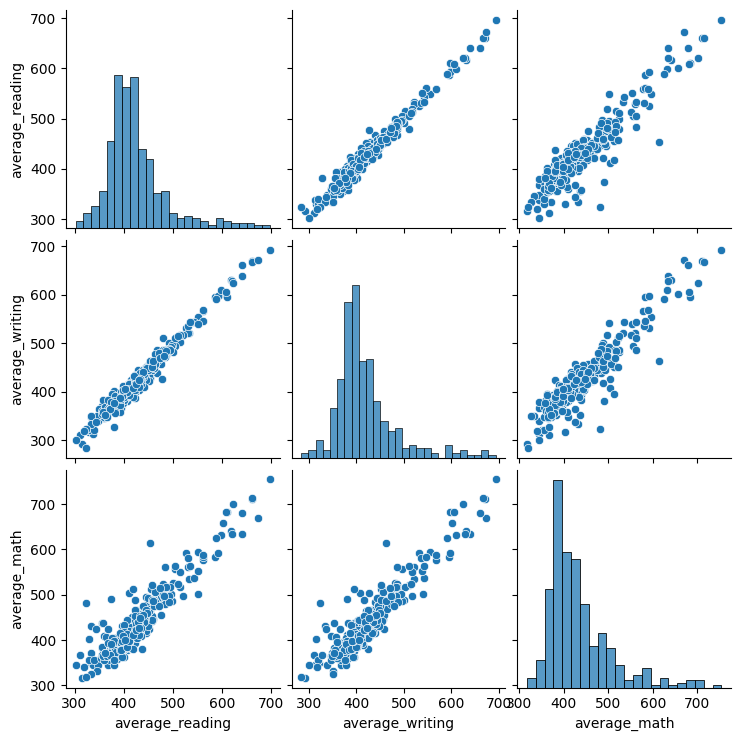

In [72]:
sns.pairplot(data=schools,
             vars=["average_reading","average_writing","average_math"])
plt.show()

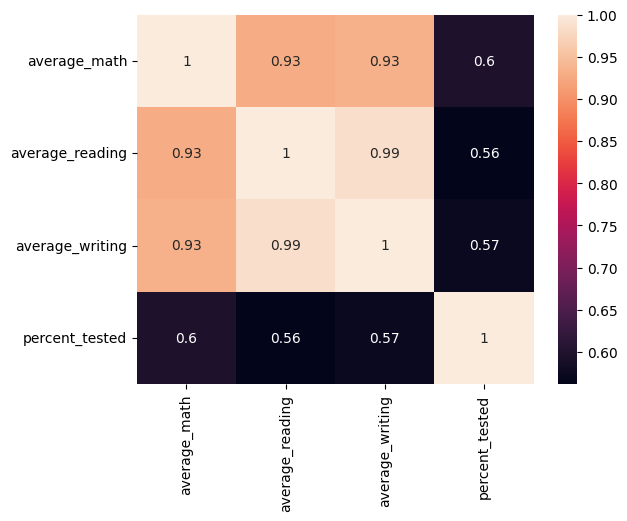

In [73]:
sns.heatmap(schools.corr(),annot=True)
plt.show()

### Which NYC schools have the best math results?

In [74]:

best_math_schools=schools[schools["average_math"]/800*100>=80.00]
best_math_schools=best_math_schools[["school_name","average_math"]].sort_values(by="average_math",ascending=False)
print(best_math_schools)

                                           school_name  average_math
88                              Stuyvesant High School           754
170                       Bronx High School of Science           714
93                 Staten Island Technical High School           711
365  Queens High School for the Sciences at York Co...           701
68   High School for Mathematics, Science, and Engi...           683
280                     Brooklyn Technical High School           682
333                        Townsend Harris High School           680
174  High School of American Studies at Lehman College           669
0    New Explorations into Science, Technology and ...           657
45                       Eleanor Roosevelt High School           641


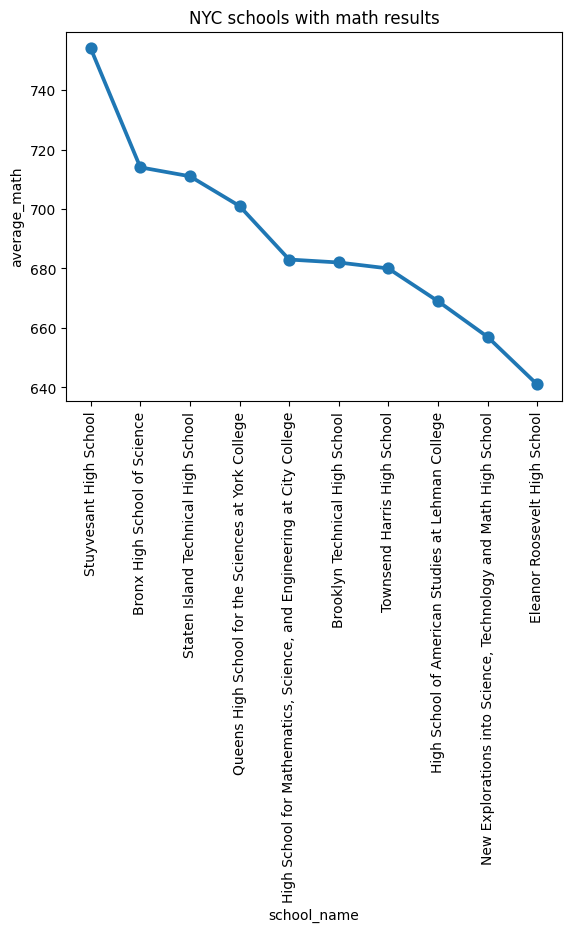

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pointplot(data=best_math_schools,x="school_name",y="average_math")
plt.title("NYC schools with math results")
plt.xticks(rotation=90)
plt.show()

###  What are the top 10 performing schools based on the combined SAT scores?

In [76]:

schools["total_SAT"]=schools["average_math"]+schools["average_reading"]+schools["average_writing"]
top_10_schools=schools[["total_SAT","school_name"]].sort_values(by="total_SAT",ascending=False).head(10)
print(top_10_schools)

     total_SAT                                        school_name
88        2144                             Stuyvesant High School
170       2041                       Bronx High School of Science
93        2041                Staten Island Technical High School
174       2013  High School of American Studies at Lehman College
333       1981                        Townsend Harris High School
365       1947  Queens High School for the Sciences at York Co...
5         1914                     Bard High School Early College
280       1896                     Brooklyn Technical High School
45        1889                      Eleanor Roosevelt High School
68        1889  High School for Mathematics, Science, and Engi...


### Which single borough has the largest standard deviation in the combined SAT score?

In [77]:
import numpy as np
data = schools.groupby("borough")["total_SAT"].agg(["std", "count", "mean"])
largest_std_dev=pd.DataFrame(data)
largest_std_dev=largest_std_dev[largest_std_dev["std"]==max(largest_std_dev["std"])]

largest_std_dev.rename(columns={"std":"std_SAT","count":"num_schools","mean":"average_SAT"},inplace=True)
largest_std_dev.reset_index()
largest_std_dev=round(largest_std_dev,2)

print(largest_std_dev)

           std_SAT  num_schools  average_SAT
borough                                     
Manhattan   230.29           89      1340.13


### Student levels

In [78]:
labels=["pass","good","very good","excellent"]
bins=[50,75,85,95,100]
schools["student_level"]=pd.cut(schools["percent_tested"],labels=labels,bins=bins)


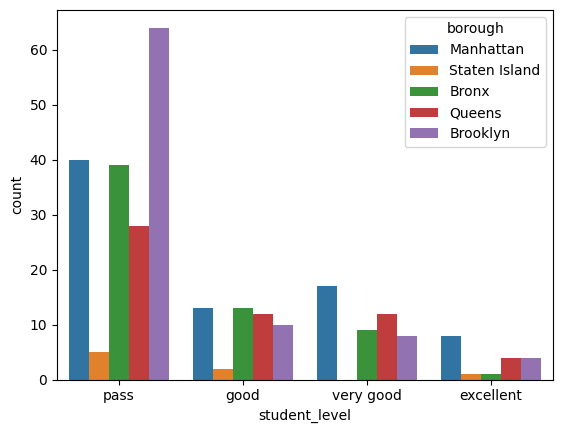

In [79]:
sns.countplot(data=schools,x="student_level",hue="borough")
plt.show()